# 머신러닝
- 머신 러닝
- 회귀 예측

## 머신러닝 

- 학습 (train) : 지도 학습 

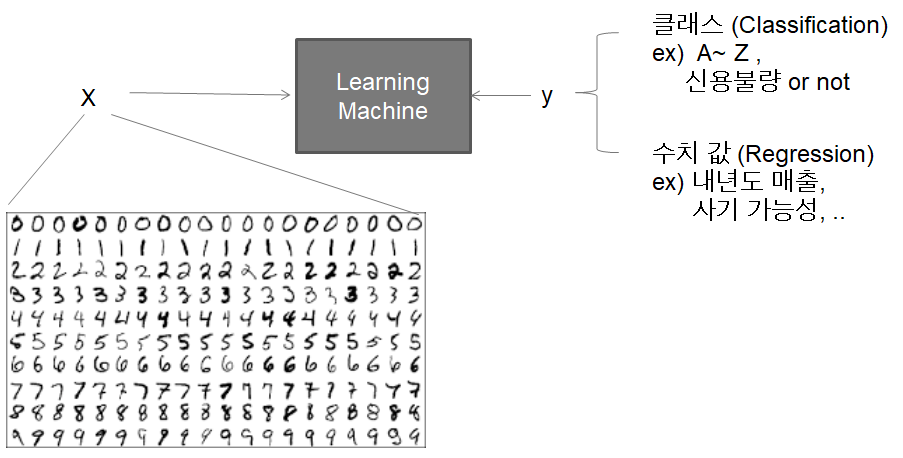
- 활용 (test)

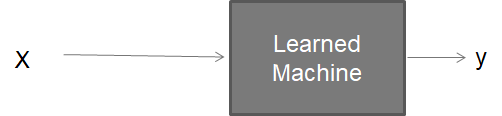

- machine learning 개발 과정

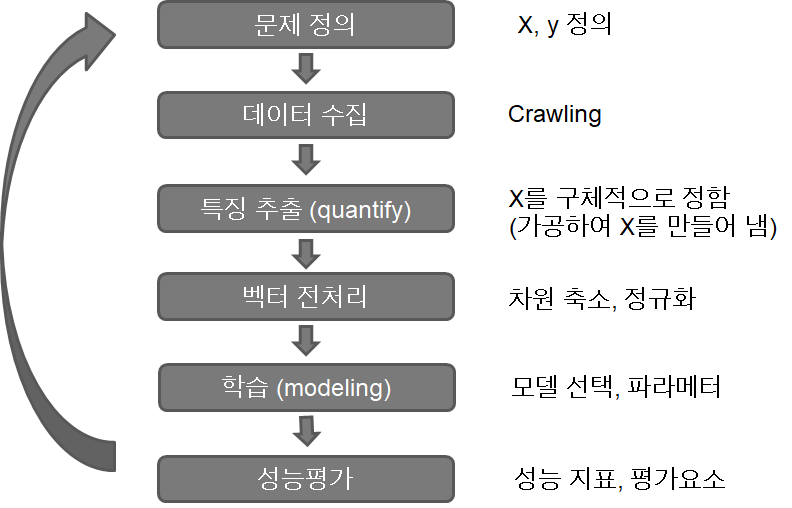


- 수치화 (quantify)

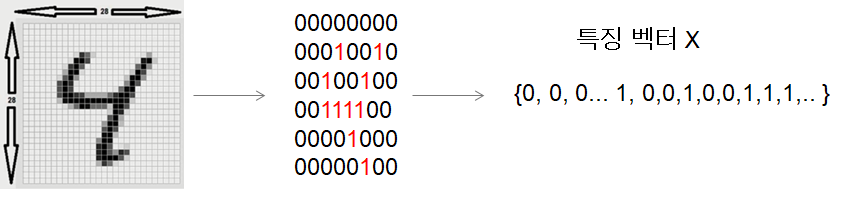

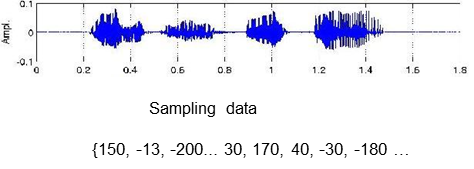

## regression (회귀 예측)

### 선형 회귀 모델 


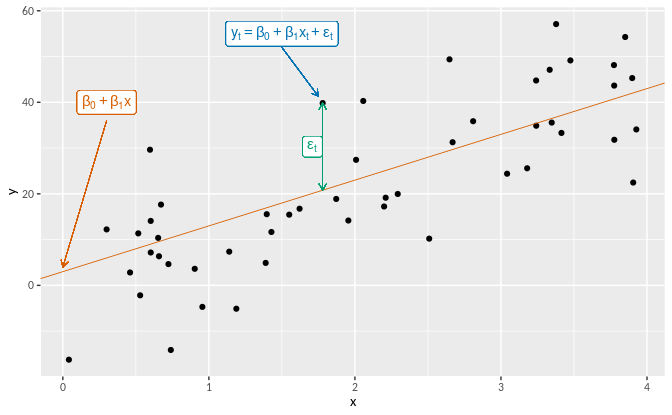

In [2]:
# 향후 버전 업에 대한 경고 메시지 출력 안하기 
import warnings

warnings.filterwarnings(action='ignore') 

### - 머신러닝 패키지 sklearn 설치

In [3]:
!pip install scikit-learn

---

## 집값 예측

## 1) 데이터 수집

In [4]:
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_california_housing 
housing = fetch_california_housing()  # key error 시 anaconda prompt 에서 pip uninstall scikit-learn 후 재설치
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

## 2) 데이터 준비 및 탐색

- housing.DESCR : 데이터 설명
- housing.data : X 데이터
- housing.feature_names: X 데이터 feature names
- housing.target : y 데이터


In [5]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [6]:
df = pd.DataFrame(housing.data, columns = housing.feature_names)
df.head()   # 상위 5개를 출력

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
df['PRICE'] = housing.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


- dataframe.shape : 보편적 데이터 형태 조회

In [8]:
print(' 주택 가격 데이터 형태 : ', df.shape)

 주택 가격 데이터 형태 :  (20640, 9)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   PRICE       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


## 3) 모델 training

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [11]:
# X, Y 분할하기
Y = df['PRICE']
X = df.drop(['PRICE'], axis=1, inplace=False)

print(X.shape, Y.shape)

(20640, 8) (20640,)


In [12]:
Y.head()


0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: PRICE, dtype: float64

- train_test_split (X, Y, test_size=비율, random_state= 결과재현을 위한 random seed고정)

In [13]:
# 훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

print( X_train.shape)
print( Y_train.shape)
print (Y_train) # row index, Y value 

(14448, 8)
(14448,)
10954    2.355
2538     0.600
5118     0.990
3269     1.406
13144    1.368
         ...  
1099     0.938
18898    1.031
11798    1.926
6637     1.535
2575     0.811
Name: PRICE, Length: 14448, dtype: float64


In [14]:
# 선형회귀분석 : 모델 생성
lr = LinearRegression()

In [15]:
# 선형회귀분석 : 모델 훈련
lr.fit(X_train, Y_train)

LinearRegression()

In [16]:
# 선형회귀분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr.predict(X_test)
Y_predict


array([2.81219561, 1.26208993, 1.43568493, ..., 1.82811758, 2.35080185,
       2.49388055])

## 4) 결과 분석 

### regression  모델 정보

In [17]:
print('Y 절편 값: ', lr.intercept_)
print('회귀 계수 값: ', np.round(lr.coef_, 1))
print (df.head())

Y 절편 값:  -35.70396107929864
회귀 계수 값:  [ 0.4  0.  -0.1  0.6 -0.  -0.  -0.4 -0.4]
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [18]:
coef = pd.Series(data =lr.coef_, index=X.columns)

print (coef)

MedInc        0.442798
HouseAge      0.009073
AveRooms     -0.115072
AveBedrms     0.611526
Population   -0.000004
AveOccup     -0.003927
Latitude     -0.407213
Longitude    -0.420488
dtype: float64


### regression 성능 지표

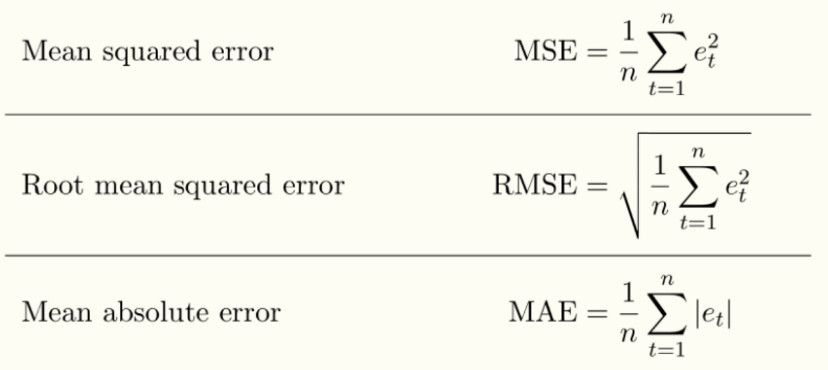

In [19]:
print ( Y_predict)
print ( Y_test)

[2.81219561 1.26208993 1.43568493 ... 1.82811758 2.35080185 2.49388055]
10385    2.78700
1943     2.07600
7490     0.96700
16889    3.53800
11416    3.90500
          ...   
16911    5.00001
15066    1.12500
19410    1.74100
10126    2.27000
18568    1.94500
Name: PRICE, Length: 6192, dtype: float64


In [20]:
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))


MSE : 0.539, RMSE : 0.734


### correlation

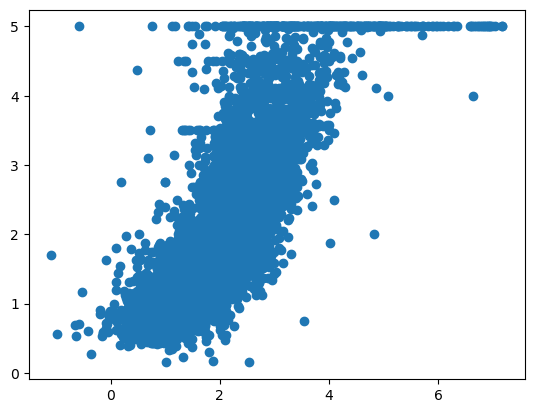

In [21]:
import matplotlib.pyplot as plt
plt.scatter(Y_predict, Y_test)

In [22]:
import scipy.stats as stats
print ( stats.pearsonr( Y_test, Y_predict))

PearsonRResult(statistic=0.7756332795047762, pvalue=0.0)


## coef 구하는 방법 :  경사하강법

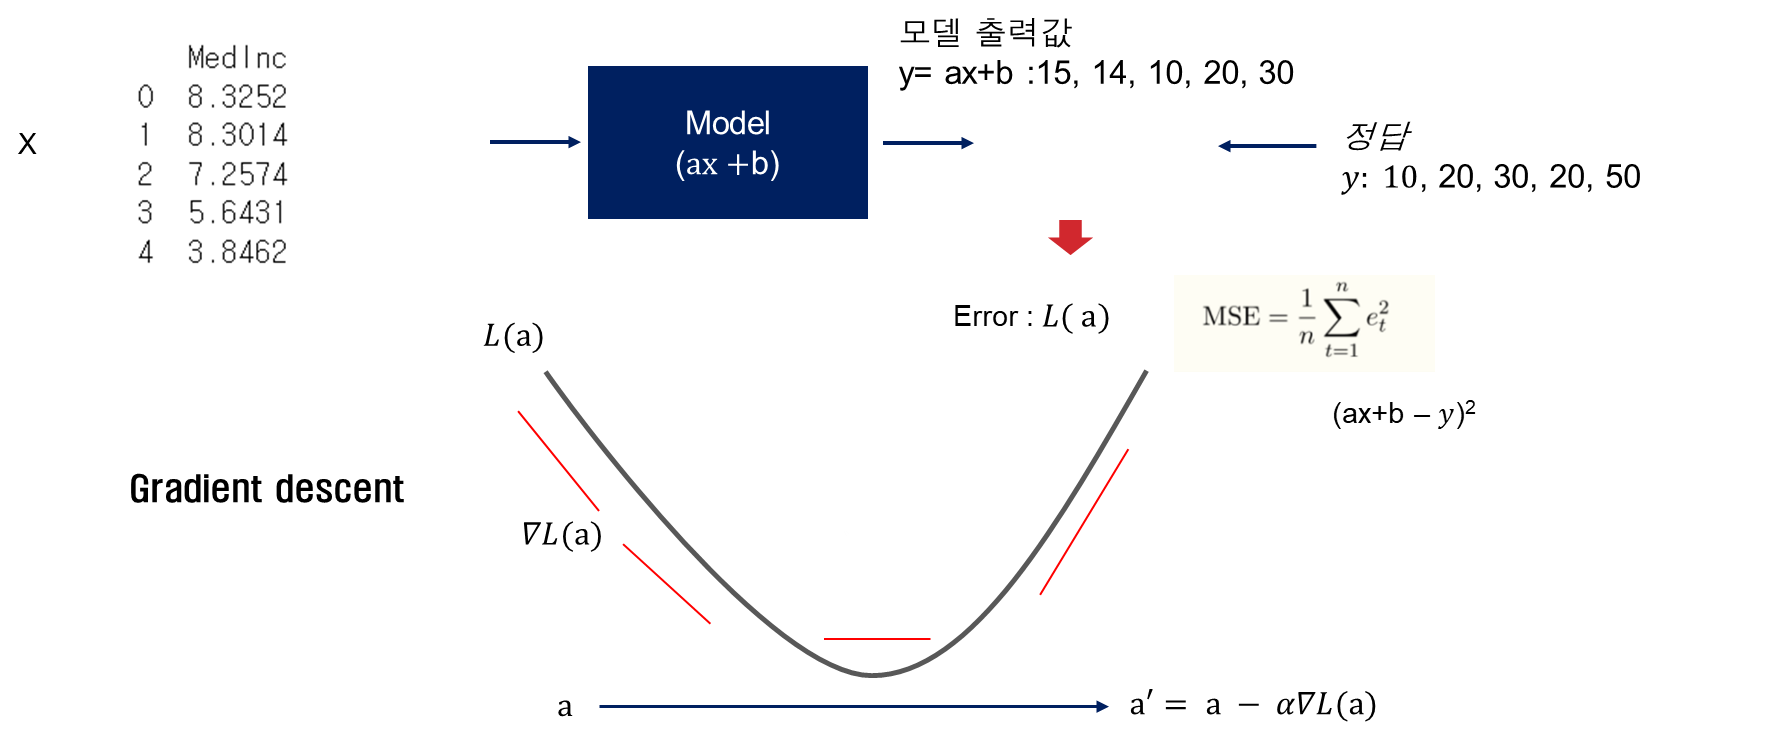

### 신경망, 딥러닝

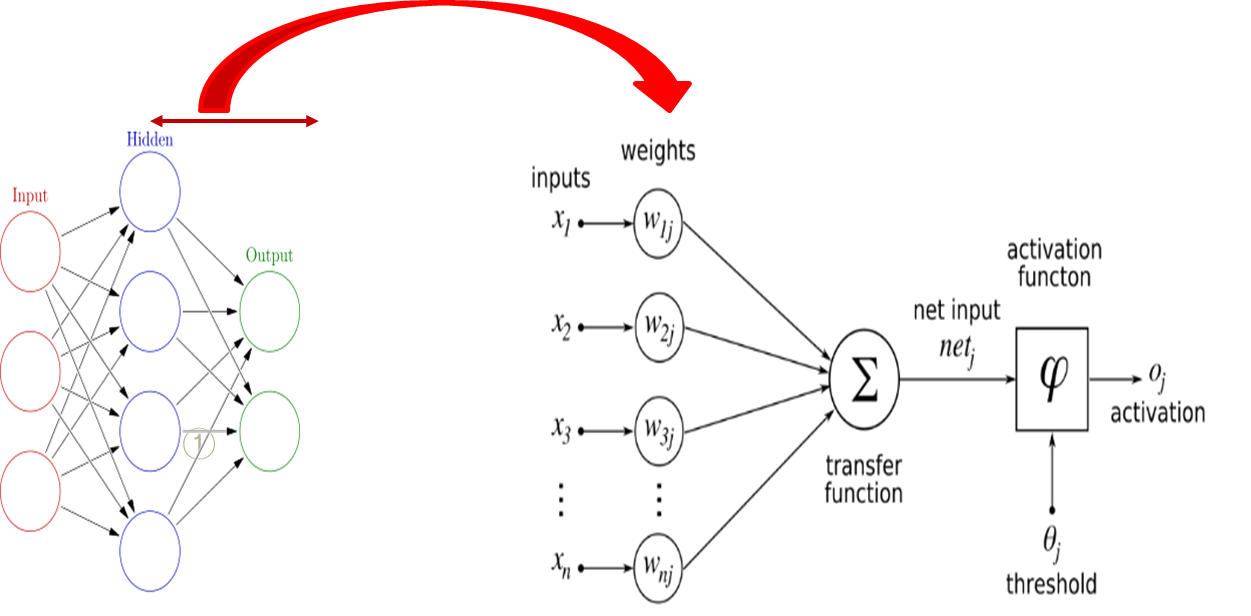

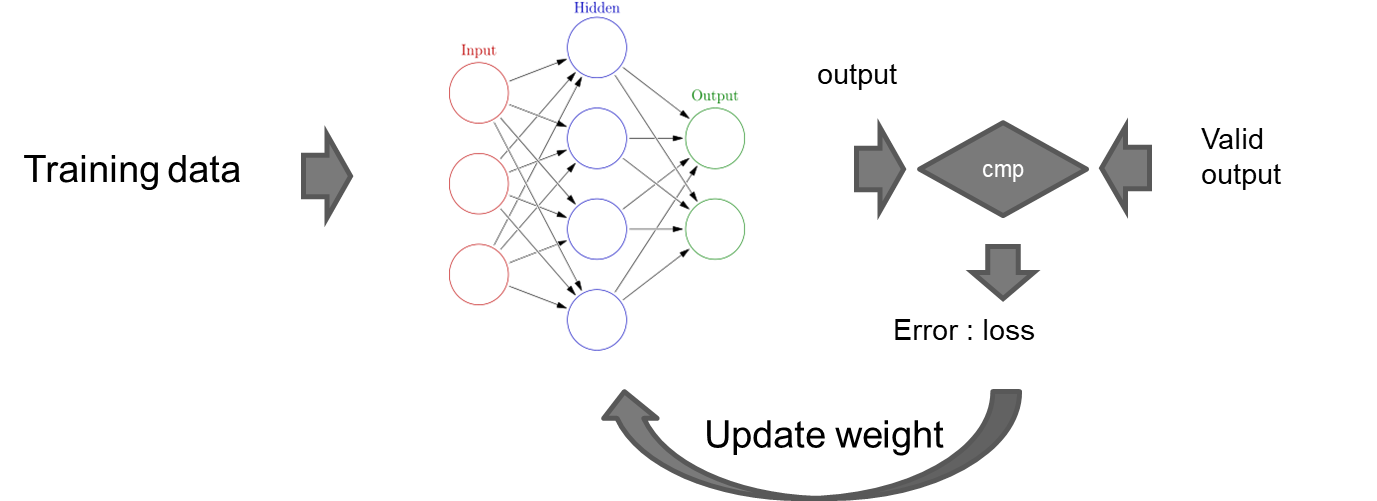

## 5)  시각화하기

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

- sns.regplot( x= X column, y= Y column, data= 데이터)

<Axes: xlabel='HouseAge', ylabel='PRICE'>

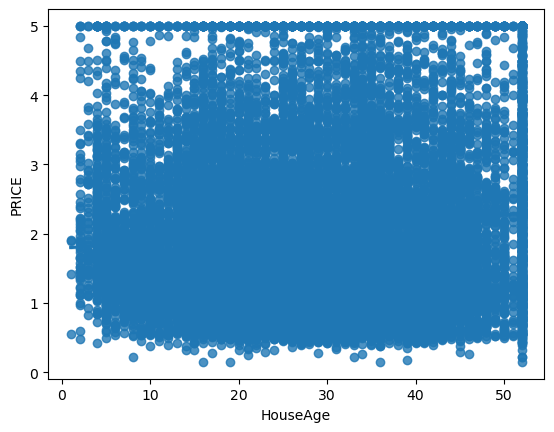

In [24]:
sns.regplot( x='HouseAge', y= 'PRICE', data= df)

- fig, axs = plt.subplots( figsize=(x크기, y크기), ncols= x칸, nrows=y칸)
- sns.regplot (  ....,  ax=axs[row][col]) 

KeyError: 'PRICE'

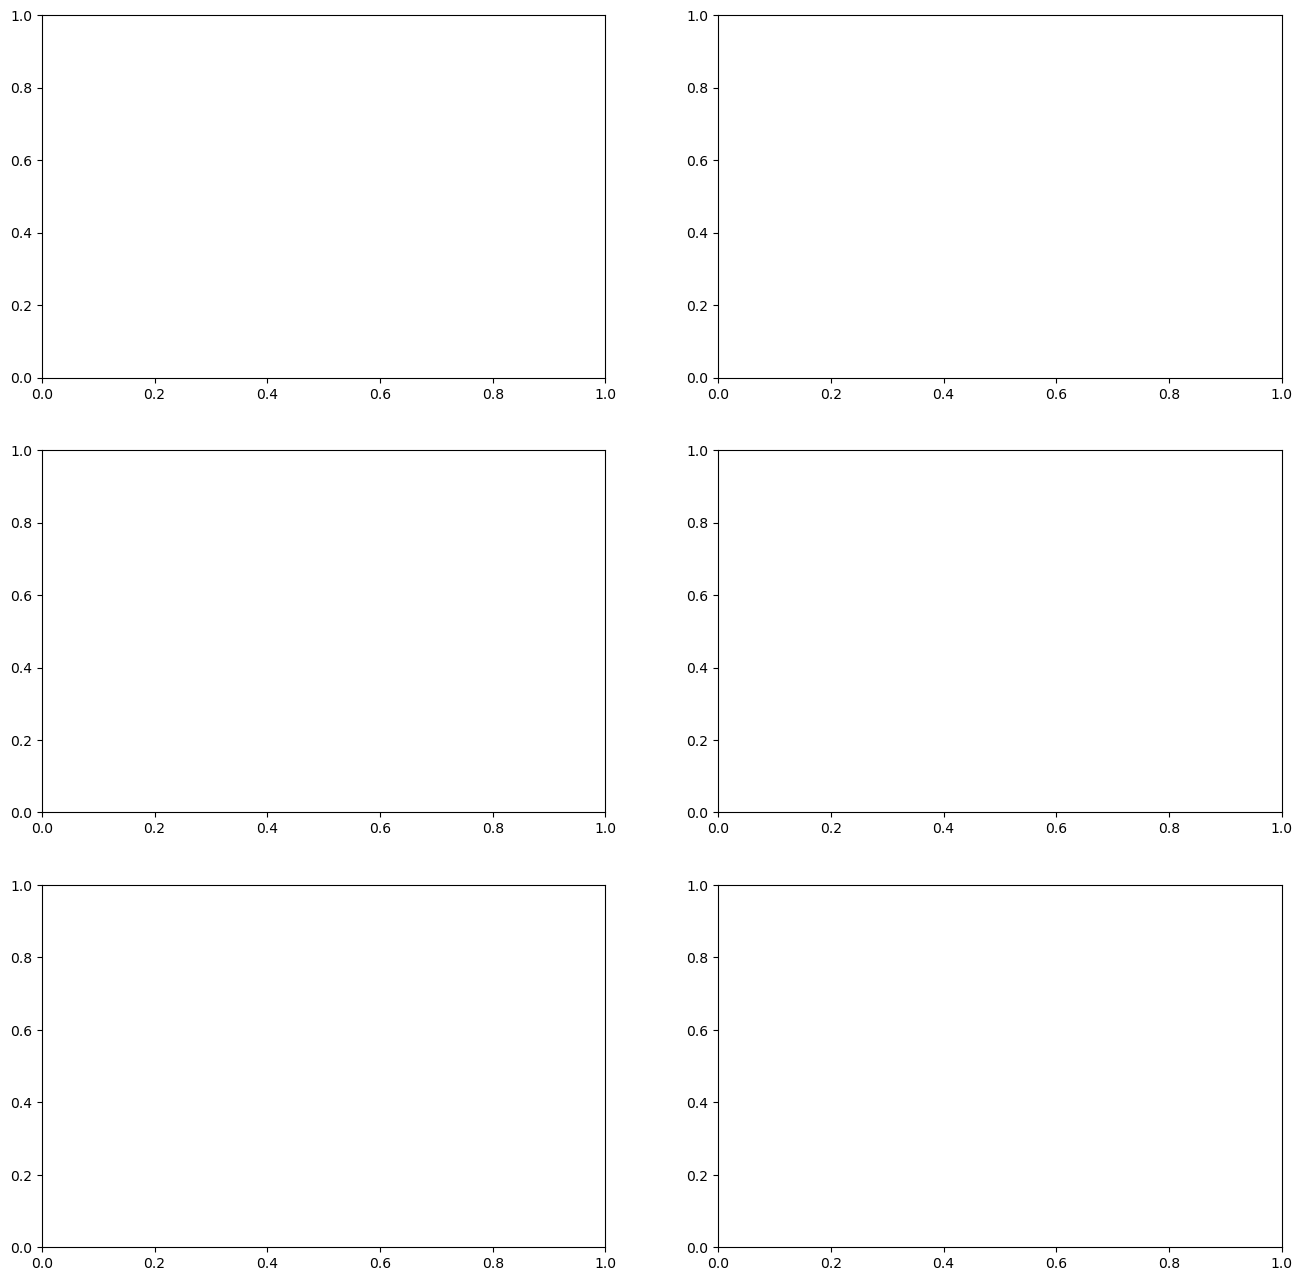

In [34]:
fig, axs = plt.subplots(figsize=(16, 16), ncols=2, nrows=3)

x_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']


for i, feature in enumerate(x_features):
      row = int(i/2)
      col = i%2

      sns.regplot(x=feature, y='PRICE', data=df, ax=axs[row][col])

## 과제1 : 전체 변수로 부터  MedIncome을 예측하는 모델을 만들고, 예측 결과의 상관계수를 계산하시오 

PearsonRResult(statistic=0.7881933849193823, pvalue=0.0)


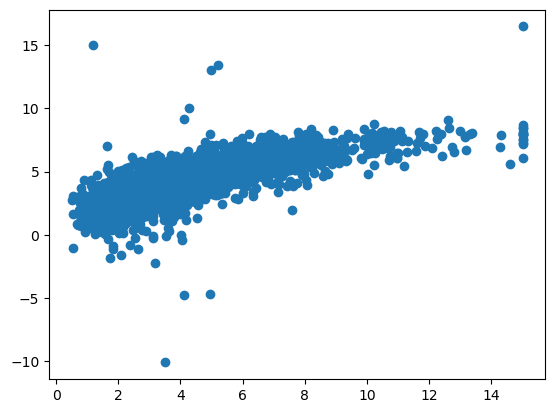

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df = pd.DataFrame(housing.data, columns = housing.feature_names)
Y = df['MedInc']
X = df.drop(['MedInc'], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 156)

lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_predict = lr.predict(X_test)

plt.scatter(Y_test, Y_predict)
print(stats.pearsonr(Y_test, Y_predict))

--- 

## 자동차연비 예측

## 1) 데이터 수집

https://archive.ics.uci.edu/ml/datasets/auto+mpg

In [36]:
import numpy as np
import pandas as pd 


data_df = pd.read_csv('auto-mpg.csv', header=0, engine='python')

## 2) 데이터 준비 및 탐색

In [37]:
print(' 데이터셋 크기 : ', data_df.shape)

data_df

 데이터셋 크기 :  (398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [38]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


#### - 분석하지 않을 변수 제외하기

- car_name : string
- origin : 명목변수 (크기가 의미가 없음)


In [39]:
#data_df = data_df.drop(['car_name', 'origin', 'horsepower'], axis=1, inplace=False)
data_df = data_df.drop(['car_name', 'origin'], axis=1, inplace=False)


In [40]:
data_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82
394,44.0,4,97.0,52,2130,24.6,82
395,32.0,4,135.0,84,2295,11.6,82
396,28.0,4,120.0,79,2625,18.6,82


- 결측치 처리

In [41]:
# error 남
data_df.horsepower= data_df.horsepower.astype('int')

ValueError: invalid literal for int() with base 10: '?'

In [ ]:
#data_df['horsepower']=='?'
data_df[data_df['horsepower']=='?']

- 결측치 처리 : horsepower , "?" 라는 값이 있어서 object로 처리됨
    - 결측치로 마킹 :  replace ('?', NaN)
    - record 전체를 날리거나, 대체값 넣어주기 : dropna, fillna

In [42]:
data_df.horsepower=data_df.horsepower.replace('?', np.NaN)
print ( data_df.shape)
data_df.info()

(398, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 21.9+ KB


In [43]:
data_df=data_df.dropna()
print ( data_df.shape)

(392, 7)


In [44]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 24.5+ KB


In [45]:
data_df.horsepower= data_df.horsepower.astype('int')
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 24.5 KB


## 3) 모델 training

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
# X, Y 분할하기

Y = data_df['mpg']
X = data_df.drop(['mpg'], axis=1, inplace=False)

In [48]:
# 훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [49]:
print ( X_train.shape)

(313, 6)


In [50]:
# 선형회귀분석 : 모델 생성
lr = LinearRegression()

In [51]:
# 선형회귀분석 : 모델 훈련
lr.fit(X_train, Y_train)

LinearRegression()

In [52]:
# 선형회귀분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr.predict(X_test)

## 4) 결과 분석 및 시각화

In [53]:
print('Y 절편 값: ',  np.round(lr.intercept_, 2))
print('회귀 계수 값: ', np.round(lr.coef_, 4))


Y 절편 값:  -16.37
회귀 계수 값:  [ 0.0521  0.0054  0.0073 -0.0074  0.1722  0.7483]


In [54]:
coef = pd.Series(data=np.round(lr.coef_, 2), index=X.columns)
#coef.sort_values(ascending=False)
coef

cylinders       0.05
displacement    0.01
horsepower      0.01
weight         -0.01
acceleration    0.17
model_year      0.75
dtype: float64

In [55]:
print (Y_predict)

[23.11699122 27.80216223 31.17136662 21.48775234 34.27965452 30.05172326
 25.72009165 12.78228199 24.99207912 30.8718869  23.90216766 31.53121782
 20.13361512 30.99906612 30.70437769 15.48956906 31.32860371 31.42838151
  9.96882278 23.34456511 26.25946487 17.86854534 18.34726786 16.08901013
  9.94233483 19.4251906  30.61101098 18.92372789 22.3198151  30.45267835
 22.17007958 25.49545437 10.11956193 29.02766769 21.26624211 14.78825599
 17.37663092 21.6009888  34.29382613 24.19874481 15.46315561 11.13638146
 21.95721646 22.69193764 22.59575709 18.06776537  7.54276406 34.71199899
 21.60415669  9.64242823 15.60063845 23.98638526 28.29734819 31.63953576
 33.68492799 22.22181539 27.66884238 21.72876917 27.87873164 32.70509553
 28.06337347 26.44166471 34.18278641 22.5113597  23.03701911 21.25804318
 21.69588701 14.23107755 32.18949992  6.05195193 29.67769022 21.55395817
 18.48861027 31.40598061 23.39975981 32.44580644 19.51521378 11.1212454
 11.61215173]


In [56]:
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))


MSE : 12.860, RMSE : 3.586


In [57]:
print (X_test)

     cylinders  displacement  horsepower  weight  acceleration  model_year
82           4         120.0          97    2506          14.5          72
167          4          97.0          75    2171          16.0          75
356          4         108.0          75    2350          16.8          81
120          4         121.0         112    2868          15.5          73
385          4          91.0          67    1995          16.2          82
..         ...           ...         ...     ...           ...         ...
23           4         121.0         113    2234          12.5          70
295          4          98.0          80    1915          14.4          79
13           8         455.0         225    3086          10.0          70
91           8         400.0         150    4464          12.0          73
62           8         350.0         165    4274          12.0          72

[79 rows x 6 columns]


### - 회귀 분석 결과를 산점도 + 선형 회귀 그래프로 시각화하기

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

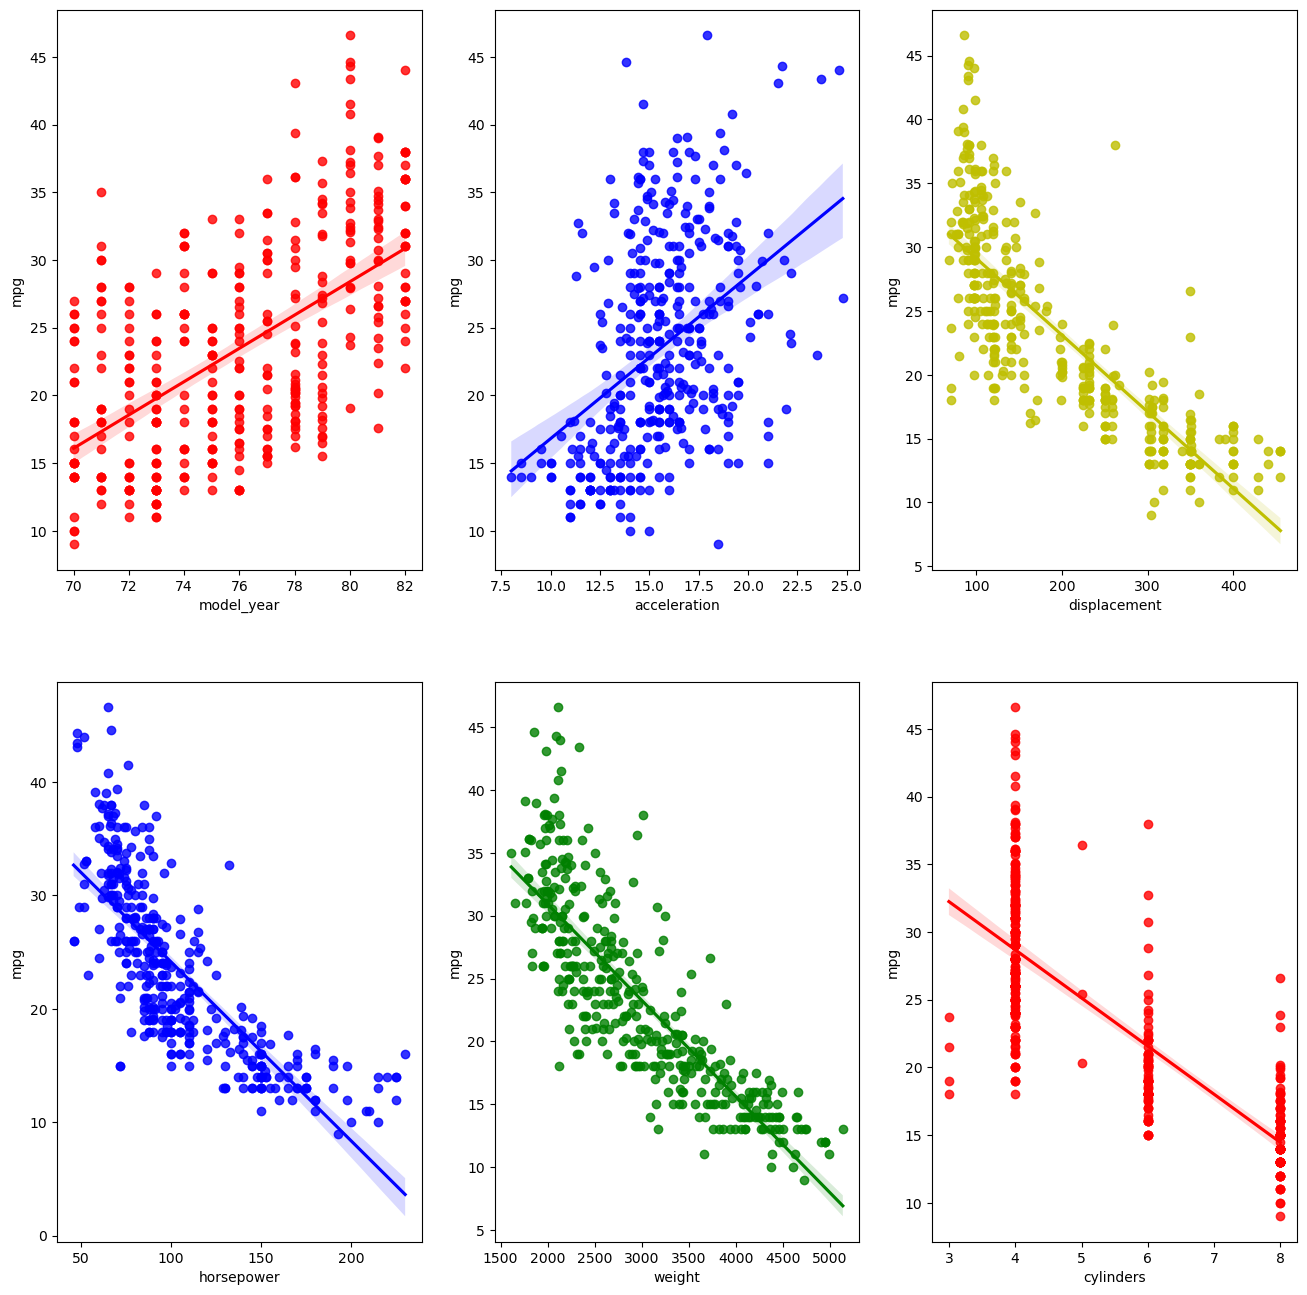

In [59]:
fig, axs = plt.subplots(figsize=(16, 16), ncols=3, nrows=2)

x_features = ['model_year', 'acceleration', 'displacement', 'horsepower','weight', 'cylinders']
plot_color = ['r', 'b', 'y', 'b','g', 'r']

for i, feature in enumerate(x_features):
      row = int(i/3)
      col = i%3
      sns.regplot(x=feature, y='mpg', data=data_df, ax=axs[row][col], color=plot_color[i])

## 과제2 : horsepower를 1/10 로 줄이고, 회귀계수가 어떻게 변하는지 본다. 

In [60]:
import numpy as np
import pandas as pd 

data_df = pd.read_csv('auto-mpg.csv', header=0, engine='python')
data_df = data_df.drop(['car_name', 'origin'], axis=1, inplace=False)
data_df.horsepower=data_df.horsepower.replace('?', np.NaN)
data_df=data_df.dropna()
data_df.horsepower= data_df.horsepower.astype('int')
data_df2 = data_df.copy()
data_df2.horsepower=data_df2.horsepower*0.1

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 원래 회귀계수
Y = data_df['mpg']
X = data_df.drop(['mpg'], axis=1, inplace=False)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=156)

lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_predict = lr.predict(X_test)

coef = pd.Series(data=np.round(lr.coef_, 3), index=X.columns)
coef


cylinders      -0.024
displacement    0.009
horsepower     -0.019
weight         -0.007
acceleration    0.009
model_year      0.759
dtype: float64

In [62]:
# 1/10 후 회귀계수
Y2 = data_df2['mpg']
X2 = data_df2.drop(['mpg'], axis=1, inplace=False)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.3, random_state=156)

lr2 = LinearRegression()
lr2.fit(X_train2, Y_train2)
Y_predict = lr2.predict(X_test2)

coef2 = pd.Series(data=np.round(lr2.coef_, 3), index=X.columns)
coef2

cylinders      -0.024
displacement    0.009
horsepower     -0.189
weight         -0.007
acceleration    0.009
model_year      0.759
dtype: float64

###   <<<< 연비 예측하기  >>>>

In [63]:
print("연비를 예측하고 싶은 차의 정보를 입력해주세요.")

cylinders_1 = int(input("cylinders (%d ~ %d): "%(data_df['cylinders'].min(), data_df['cylinders'].max())))
displacement_1 = int(input("displacement (%d ~ %d): "%(data_df['displacement'].min(), data_df['displacement'].max())))
horsepower_1=int(input("horsepower (%d ~ %d): "%(data_df['horsepower'].min(), data_df['horsepower'].max())))
weight_1 = int(input("weight (%f ~ %f): "%(data_df['weight'].min(), data_df['weight'].max())))
acceleration_1 = int(input("acceleration (%f ~ %f): "%(data_df['acceleration'].min(), data_df['acceleration'].max())))
model_year_1 = int(input("model_year (%f ~ %f): "%(data_df['model_year'].min(), data_df['model_year'].max())))

연비를 예측하고 싶은 차의 정보를 입력해주세요.


cylinders (3 ~ 8):  4
displacement (68 ~ 455):  68
horsepower (46 ~ 230):  47
weight (1613.000000 ~ 5140.000000):  1613
acceleration (8.000000 ~ 24.800000):  8
model_year (70.000000 ~ 82.000000):  70


In [68]:
mpg_predict = lr.predict([[cylinders_1, displacement_1, horsepower_1, weight_1, acceleration_1 , model_year_1]])

In [69]:
print("이 자동차의 예상 연비(mpg)는 %.2f 입니다." %mpg_predict)

이 자동차의 예상 연비(mpg)는 27.99 입니다.


## 5) 결과 개선 

- 다른 regression model
- parameter tuning 
- feature selection

### 모델 변경
- linear regression

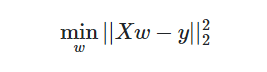
- ridge regression : 계수의 영향력을 줄이기 위함
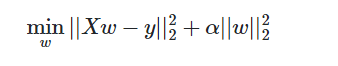

In [70]:
from sklearn import linear_model

models= [ LinearRegression(), linear_model.Ridge(alpha=.5) ]

for m in models:
    m.fit(X_train, Y_train)
    Y_predict= m.predict(X_test)
    mse = mean_squared_error(Y_test, Y_predict)
    print (mse)

15.221923496980553
15.221971548382824


### parameter tuning

In [71]:

for al in range(0, 10):
    m= linear_model.Ridge(alpha=al/float(10)) 
    m.fit(X_train, Y_train)
    Y_predict= m.predict(X_test)
    mse = mean_squared_error(Y_test, Y_predict)
    print (al/10, mse)

0.0 15.22192349698055
0.1 15.221933211278134
0.2 15.22194287327965
0.3 15.221952483273434
0.4 15.221962041546163
0.5 15.221971548382824
0.6 15.221981004066809
0.7 15.221990408879815
0.8 15.221999763101957
0.9 15.222009067011681


### feature selection

- 사용할 feature 선택
- K-best : feature 중 score가 높은 것 k 개 선택
- transform : k개 만 남기는 걸로 변환

cylinders: 397.567626
displacement: 525.768275
horsepower: 464.591439
weight: 635.047111
acceleration: 68.293547
model_year: 141.346354


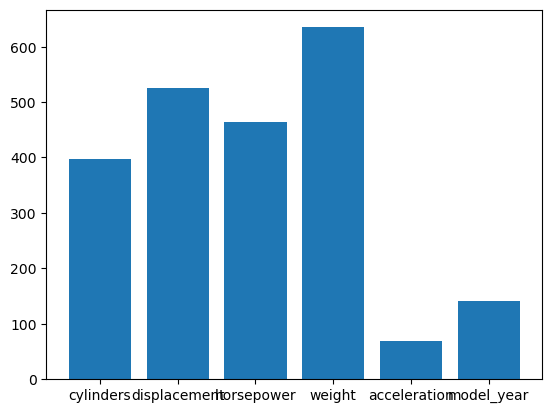

In [72]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
 
# feature selection
def select_features(X_train, y_train, X_test, k):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k=k)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
X_train_fs, X_test_fs, fs = select_features(X_train, Y_train, X_test,6)

for i in range(len(fs.scores_)):
	print('%s: %f' % (X_test.columns[i], fs.scores_[i]))
# plot the scores
pyplot.bar(X_test.columns, fs.scores_)
pyplot.show()

In [73]:
# 하나 씩 늘려가면서 score 보기

for k in range(1,7) :
    X_train_fs, X_test_fs, fs = select_features(X_train, Y_train, X_test, k)

    m= LinearRegression()
    m.fit(X_train_fs, Y_train)
    Y_predict= m.predict(X_test_fs)
    mse = mean_squared_error(Y_test, Y_predict)
    print (k,  mse)

1 22.23065462646595
2 21.5388056523199
3 21.43172352814243
4 21.60900807569379
5 15.236824054102382
6 15.221923496980553


## 6) validation, test 

- 파라메터 선택 => 결과에 많은 영향을 줌
- test set을 이용한 파라메터 선택은 test set 에 fit 되었다고 볼 수도 있음
- 해결 방향 : 파라메터 선택을 위한 validation set과, 성능 평가를 위한 test set을 분리



In [74]:
# 6:2:2  split
X_train, X_tv, Y_train, Y_tv = train_test_split(X, Y, test_size=0.4, random_state=1)
X_test, X_validation, Y_test, Y_validation = train_test_split(X_tv, Y_tv, test_size=0.5, random_state=1)
print (X_train.shape, X_validation.shape, X_test.shape)


(235, 6) (79, 6) (78, 6)


In [75]:
# 파라메터 선택  : alpha =0 
for al in range(0, 10):
    m= linear_model.Ridge(alpha=al/10) 
    m.fit(X_train, Y_train)
    Y_predict= m.predict(X_validation)
    #print (Y_validation, Y_predict)
    mse = mean_squared_error(Y_validation, Y_predict)
    print (al/10, mse)

0.0 13.101946217887653
0.1 13.101888781644634
0.2 13.10183189796544
0.3 13.101775564049024
0.4 13.101719777113974
0.5 13.101664534398344
0.6 13.101609833159474
0.7 13.10155567067378
0.8 13.101502044236755
0.9 13.10144895116256


In [76]:
# test 
m= linear_model.Ridge(alpha=9/float(10)) 
m.fit(X_train, Y_train)
Y_predict= m.predict(X_test)
mse = mean_squared_error(Y_test, Y_predict)
print (mse)


12.283561812650028


## 7) train, test data 에 따라 달라지는 결과 


In [77]:
for i in range(11, 20):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=i)
    m= linear_model.Ridge(alpha=9/float(10)) 
    m.fit(X_train, Y_train)
    Y_predict= m.predict(X_test)
    mse = mean_squared_error(Y_test, Y_predict)
    print (mse)

13.614575026614142
16.748906837280252
12.699045746816077
11.833687035104457
14.951610665806605
13.72191795373847
12.253501042248065
11.80192670210712
11.084625958290957


## cross validation

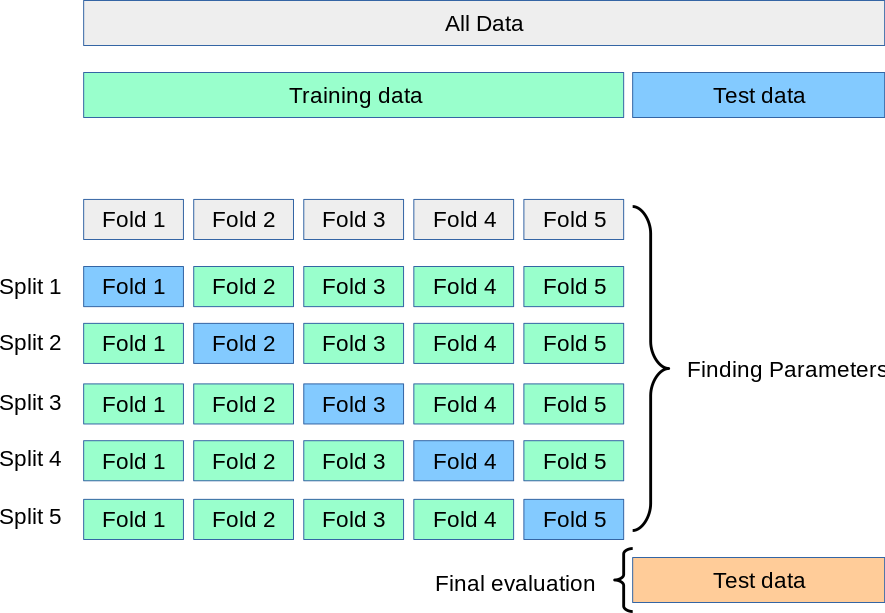

- KFold- 고정 분할

In [78]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, make_scorer

m= linear_model.Ridge(alpha=float(9)/10) 
scores= cross_validate(m, X, Y, cv=5 , scoring=make_scorer(mean_squared_error))

print ( scores['test_score'])

[15.60375576 11.40897318  6.30763871 15.28177556 30.76650039]


- KFold - random 추출

In [79]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, make_scorer
kfold=KFold(n_splits=5, shuffle=True, random_state=1) # shuffle = False 면 고정 추출
scores= cross_val_score(m, X, Y, cv=kfold, scoring=make_scorer(mean_squared_error))
print (scores)

[12.85906308 11.89695142 15.57385616 11.22008104  9.5606908 ]


## 과제3 : housing data 를  5-fold로 cross validation하여 score를 구하시오

In [81]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, make_scorer

m= linear_model.Ridge(alpha=float(9)/10) 
scores= cross_validate(m, X, Y, cv=5 , scoring=make_scorer(mean_squared_error))

print ( scores )

{'fit_time': array([0.00602174, 0.00330997, 0.00269008, 0.00187182, 0.00174809]), 'score_time': array([0.0027132 , 0.00161314, 0.00132823, 0.00113726, 0.00110674]), 'test_score': array([15.60375576, 11.40897318,  6.30763871, 15.28177556, 30.76650039])}
